# LSTM

# Unlocking Market Insight with LSTM

## Introduction
"What if we could capture the hidden memory of the market?"

Markets are shaped by patterns, momentum, and historical context. While many models struggle to recognize these, LSTMs (Long Short-Term Memory networks) excel by remembering information over long periods. Let’s explore how LSTM technology unlocks deeper insights for stock market prediction.

---

## What is LSTM?
LSTM stands for Long Short-Term Memory. It is a special kind of Recurrent Neural Network (RNN) capable of learning long-term dependencies.

### Key Characteristics:
- **Recursive Neural Network (RNN)** foundation, designed for sequence-based data.
- **LSTM cells** use gates (input, forget, output) to control information flow.
- Enables **selective memory retention** and **long-term dependency learning**.

---

## How Does LSTM Work?
LSTM networks process data through a series of steps within each LSTM cell:
- **Input Gate**: Determines which values from the input to update.
- **Forget Gate**: Decides what information to discard.
- **Output Gate**: Chooses the output based on the cell state.

These mechanisms allow the network to maintain and update memory over time, solving issues like the vanishing gradient problem common in standard RNNs.

---

## Why LSTM for Stock Markets?
Stock markets are inherently temporal and noisy. LSTM models outperform others due to their ability to:

- **Capture long-term dependencies** across market cycles.
- **Recognize complex patterns** in sequential data that span long time periods.
- **Handle multivariate inputs**, such as price, volume, sentiment, and macroeconomic data.
- **Adapt to temporal dynamics**, critical for understanding momentum and volatility.
- **Avoid vanishing gradient issues** with their advanced memory cell architecture.

---

## Applications Beyond Finance
LSTMs have demonstrated success in many fields, reinforcing their versatility:
- **Text and speech modeling** (e.g., NLP, chatbots)
- **Machine translation**
- **Anomaly detection in time series**
- **Text classification and sentiment analysis**

Their ability to understand **temporally dynamic** and **sequential data** makes them valuable across domains.

---

## Conclusion
In a world where data flows in sequences and time-dependent patterns, LSTMs provide a powerful tool. For financial markets, this means:
- Better prediction of future trends.
- More adaptive, memory-driven strategies.
- Competitive edge in a data-rich, fast-changing environment.

LSTM: Because in the markets, memory is money.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

df = pd.read_csv("../data/processed_combined_data.csv")
# features = df[['close_NVDA', 'oil',"Electricity_Proxy", "Semiconductor_ETF", "Lithium_ETF", "Gold_Futures","VIX_Index","Gold_Futures" ]].values
features = df[['close_NVDA', 'oil']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features.reshape(-1, 1))

In [ ]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 20
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
# train_size = int(len(X) * 0.8)
# X_train, y_train = X[:train_size], y[:train_size]
# X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
# model.add(LSTM(units=50))
# model.add(Dense(units=1))

# model.compile(optimizer='adam', loss='mean_squared_error')
# model.summary()

In [ ]:
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# predicted = model.predict(X_test)
# predicted_prices = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))
# actual_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))


In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 6))
# plt.plot(actual_prices, color="black", label="Echter Preis")
# plt.plot(predicted_prices, color="green", label="Vorhergesagter Preis")
# plt.title("LSTM Aktienkurs Vorhersage (X_test)")
# plt.xlabel("Zeit")
# plt.ylabel("Preis")
# plt.legend()
# plt.show()

In [ ]:
# train_predicted = model.predict(X_train)
# train_predicted_prices = scaler.inverse_transform(train_predicted)

# plt.plot(range(seq_length, seq_length + len(train_predicted_prices)),
#          train_predicted_prices, label="Vorhergesagt (Train)", color="blue")

# # Plot für echte Testpreise
# plt.plot(range(seq_length + len(train_predicted_prices),
#                seq_length + len(train_predicted_prices) + len(actual_prices)),
#          actual_prices, label="Echter Preis (Test)", color="black")

# # Plot für vorhergesagte Testpreise
# plt.plot(range(seq_length + len(train_predicted_prices),
#                seq_length + len(train_predicted_prices) + len(predicted_prices)),
#          predicted_prices, label="Vorhergesagt (Test)", color="green")

# # Trennlinie
# plt.axvline(x=seq_length + len(train_predicted_prices), color='red', linestyle='--', label='Train/Test-Split')

# plt.title("LSTM Aktienkurs Vorhersage")
# plt.xlabel("Zeit (Index)")
# plt.ylabel("Preis")
# plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mse = mean_squared_error(actual_prices, predicted_prices)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(actual_prices, predicted_prices)
# r2 = r2_score(actual_prices, predicted_prices)

# print(f"📊 MSE  = {mse:.4f}")
# print(f"📊 RMSE = {rmse:.4f}")
# print(f"📊 MAE  = {mae:.4f}")
# print(f"📈 R²   = {r2:.4f}")

# mit Timeseries cross validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


tscv = TimeSeriesSplit(n_splits=5)

def create_model(input_shape=(20, 1)):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1)) 
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

cv_mae_scores = []
for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold+1}:")
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Modell trainieren und bewerten
    model = create_model()  
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    print(f"  MAE: {mae:.4f}")
    cv_mae_scores.append(mae)
    

Fold 1:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
  MAE: 0.0124
Fold 2:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
  MAE: 0.0131
Fold 3:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
  MAE: 0.0166
Fold 4:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
  MAE: 0.0143
Fold 5:


/home/julia/dev/neuefische-dataScience/capstone-SignalSigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
  MAE: 0.0191


Epoch 1/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - loss: 6.0223e-05 - val_loss: 4.5761e-04
Epoch 2/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - loss: 5.0830e-05 - val_loss: 4.6069e-04
Epoch 3/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - loss: 4.9911e-05 - val_loss: 3.2635e-04
Epoch 4/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - loss: 5.4336e-05 - val_loss: 3.8723e-04
Epoch 5/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 62s 101ms/step - loss: 5.8018e-05 - val_loss: 3.7500e-04
Epoch 6/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 51s 83ms/step - loss: 5.1427e-05 - val_loss: 5.2262e-04
Epoch 7/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 51s 83ms/step - loss: 4.1849e-05 - val_loss: 4.7075e-04
Epoch 8/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - loss: 4.4075e-05 - val_loss: 5.2274e-04
Epoch 9/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - loss: 4.4038e-05 - val_loss: 5.2901e-04
Epoch 10/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - loss: 4.1579e-05 - val_loss: 5.7969e-04
Epoch 11/50
620/620 ━━━━━━━━━━━━━━━━━━

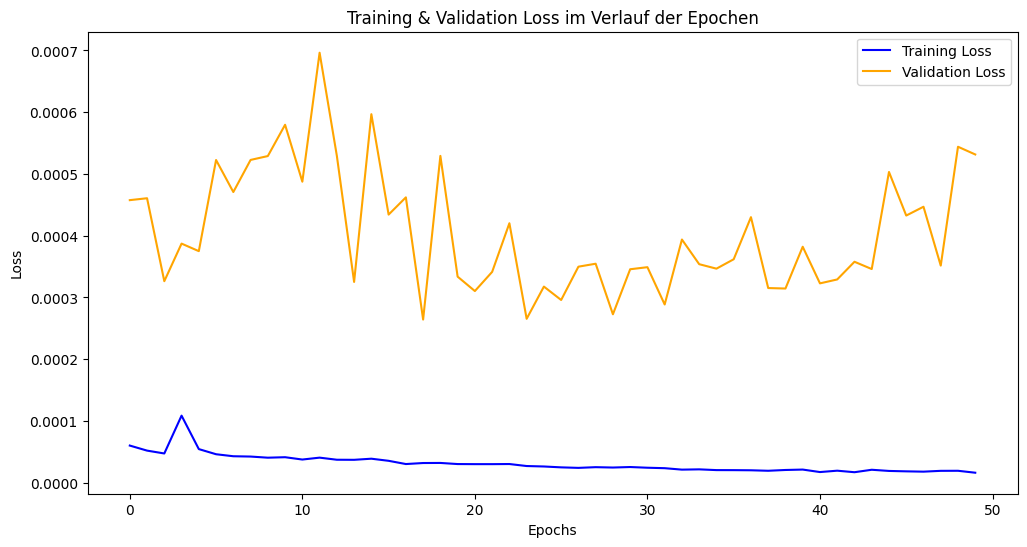

In [ ]:
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# # Fehler (Loss) für Training und Validierung plotten
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Training Loss', color='blue')
# plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
# plt.title('Training & Validation Loss im Verlauf der Epochen')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

620/620 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step


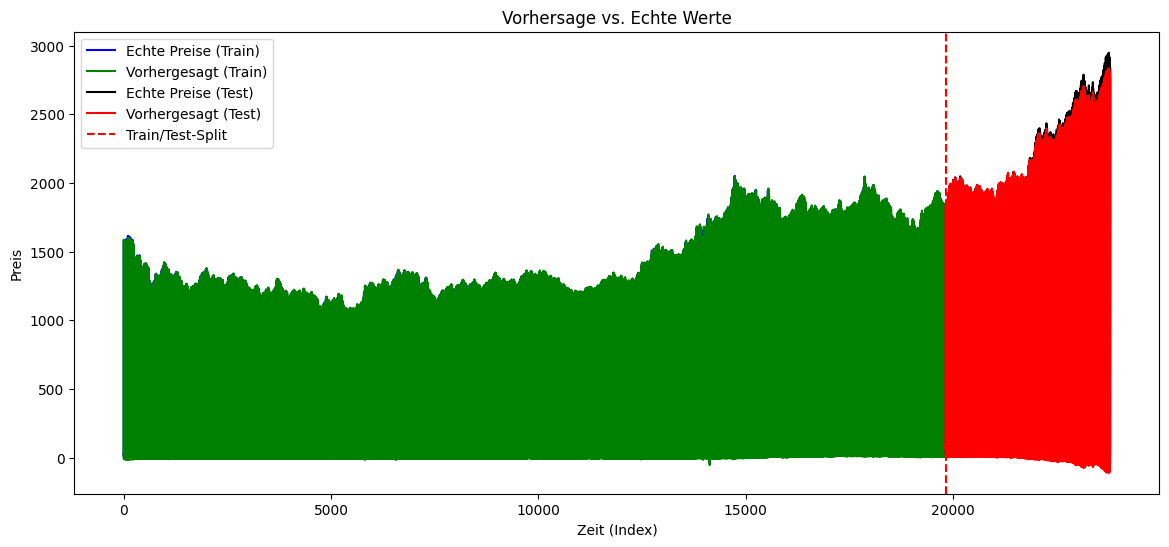

In [ ]:
# Vorhersage für Trainings- und Testdaten
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Vorhersage zurückskalieren (um echte Preiswerte zu erhalten)
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(y_train_actual, label='Echte Preise (Train)', color='blue')
plt.plot(train_pred, label='Vorhergesagt (Train)', color='green')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label='Echte Preise (Test)', color='black')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(test_pred)), test_pred, label='Vorhergesagt (Test)', color='red')

plt.axvline(x=len(y_train_actual), color='red', linestyle='--', label='Train/Test-Split')

plt.title('Vorhersage vs. Echte Werte')
plt.xlabel('Zeit (Index)')
plt.ylabel('Preis')
plt.legend()
plt.show()

In [ ]:
mae_cv = np.mean(cv_mae_scores)

# print("🔍 Vergleich der MAE:")
# print(f"Ohne CV: {mae:.4f}")
print(f"Mit CV : {mae_cv:.4f}")

Mit CV : 0.0151


# -> Use  TimeSeriesSplit for cross validation!

🔍 **Vergleich der MAE:**

- **Ohne CV:** `0.0554`  
- **Mit CV:** / nur close `0.0147`
- **Mit CV:** / close, oil `0.0236`
- **Mit CV** / 'close_NVDA', 'oil',"Electricity_Proxy", "Semiconductor_ETF", "Lithium_ETF", "Gold_Futures","VIX_Index","Gold_Futures" `0.0166`
- **inputshape(20,1) anstatt (60,1)** `0.0151`